# Churn Classification Model

### Import

In [65]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
data = pd.read_csv('../dataset/findata_challenge_train.csv')

In [67]:
data.head(3)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x116,x117,x118,x119,x120,x121,x122,x123,x124,y
0,0.067563,-2.172492,-1.713774,-0.146854,-0.685219,-0.933838,4.0,2.0,-4.476051,-1.472306,...,4.607926,52.0,1.0,0.773809,0.766531,6.307142,9.074515,-2.694049,0.330964,0
1,0.099622,0.584803,-6.089758,-0.252186,-0.334912,-4.671281,4.0,2.0,-0.387076,-0.664552,...,15.889763,53.0,1.0,7.065852,0.994304,-0.028411,-21.472850,5.626095,1.293455,0
2,0.648421,3.881137,0.961359,0.217361,-1.471850,-0.975352,5.0,1.0,-0.850146,-4.011487,...,13.770410,53.0,1.0,-8.598553,-2.958302,-12.784030,-36.855873,0.356093,1.499790,0


In [68]:
tot_obs = len(data)
tot_feat = len(data.columns) - 1
tot_num_feat = len(data._get_numeric_data().columns) - 1
tot_cat_feat = tot_feat - tot_num_feat


print(f'Data details')
print('-'*22)
print(f'Total observation    : {tot_obs}')
print(f'Total features       : {tot_feat}')
print(f'Numerical features   : {tot_num_feat}')
print(f'Categorical features : {tot_cat_feat}')

Data details
----------------------
Total observation    : 100000
Total features       : 125
Numerical features   : 120
Categorical features : 5


# Handling Missing Values

Check missing value percentage for each column

  col_name  perc (%)
0      x45     0.159
1      x70     0.159
2      x14     0.156
3      x72     0.149
4     x110     0.148
5      x75     0.146
6      x13     0.145
7     x112     0.142
8      x10     0.142
9      x86     0.141


<AxesSubplot:xlabel='perc (%)'>

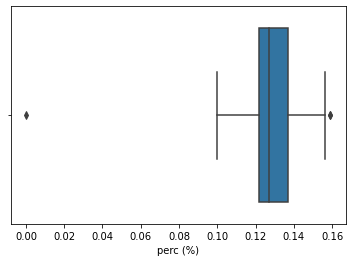

In [69]:
perc_missing = (data.isna().sum()/len(data)).sort_values(ascending=False)*100
perc_missing = pd.DataFrame(
               {'col_name': perc_missing.index, 'perc (%)': perc_missing.values})
print(perc_missing.head(10))
sns.boxplot(data=perc_missing, x='perc (%)')

In [70]:
# Check missing values row-wise
data.isna().sum(axis=1).describe()

count    100000.00000
mean          0.16024
std           0.36683
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.00000
dtype: float64

As we can see, there's no column that has significant missing values ***(max is 0.159% missing)***. 

And as we almost don't know each context of the column, so we can just change the missing value with `median` for **numerical value** and `mode` for **categorical value**.

In [24]:
# Get numerical column and categorical column
num_col = data._get_numeric_data().columns[:-1]
cat_col = data.drop(num_col, axis=1).columns[:-1]

In [78]:
for col in cat_col:
    data[col] = data[col].fillna(data[col].mode()[0])

for col in num_col:
    data[col] = data[col].fillna(data[col].median())

In [80]:
perc_missing = (data.isna().sum()/len(data)).sort_values(ascending=False)*100
perc_missing = pd.DataFrame({'col_name':perc_missing.index, 'perc (%)':perc_missing.values})
perc_missing.describe()

,perc (%)
count,126.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


Missing value handled, now there's no missing value left.

# Exploratory Data Analysis

Since there's only 5 column (total categorical feature) that we can guess the meaning of, we only do EDA on those column. Let's see each of their distribution and also their relation to the target value (churn or not).

In [84]:
categorical_df = data[cat_col].copy()
categorical_df.head(3)

,x21,x79,x89,x108,x112
0,Jun,Laki-laki,Jambi,SMP,May
1,Jul,Perempuan,Sumatera Barat,SMP,May
2,Jul,Perempuan,Sumatera Selatan,SD,Jun


First take away
kalo data categorical nya ada yg timpang, lebih baik di classing biar ga bias modelnya.

In [95]:
# Get unnormalized numerical data
s = (data[num_col].min() > 0)
not_norm_col = s[s].index
data[not_norm_col].head()

,x63,x80,x93,x96,x117
0,13.0,2019.0,2010.0,9.0,52.0
1,13.0,2018.0,2009.0,14.0,53.0
2,14.0,2019.0,2009.0,16.0,53.0
3,14.0,2018.0,2014.0,10.0,50.0
4,14.0,2017.0,2011.0,13.0,47.0
